# Chapter 5: Fundamentals of machine learning

(60000, 28, 28)
(60000, 784)
(60000, 1568)
(60000, 1568)
Epoch 1/10
375/375 - 7s - loss: 0.6067 - accuracy: 0.8142 - val_loss: 0.2601 - val_accuracy: 0.9209
Epoch 2/10
375/375 - 8s - loss: 0.2529 - accuracy: 0.9208 - val_loss: 0.2185 - val_accuracy: 0.9367
Epoch 3/10
375/375 - 7s - loss: 0.1657 - accuracy: 0.9490 - val_loss: 0.1696 - val_accuracy: 0.9504
Epoch 4/10
375/375 - 8s - loss: 0.1172 - accuracy: 0.9637 - val_loss: 0.1279 - val_accuracy: 0.9639
Epoch 5/10
375/375 - 7s - loss: 0.0836 - accuracy: 0.9734 - val_loss: 0.1224 - val_accuracy: 0.9628
Epoch 6/10
375/375 - 8s - loss: 0.0633 - accuracy: 0.9794 - val_loss: 0.1364 - val_accuracy: 0.9614
Epoch 7/10
375/375 - 8s - loss: 0.0456 - accuracy: 0.9856 - val_loss: 0.1893 - val_accuracy: 0.9496
Epoch 8/10
375/375 - 9s - loss: 0.0341 - accuracy: 0.9887 - val_loss: 0.1141 - val_accuracy: 0.9702
Epoch 9/10
375/375 - 7s - loss: 0.0272 - accuracy: 0.9913 - val_loss: 0.1201 - val_accuracy: 0.9693
Epoch 10/10
375/375 - 7s - loss: 0.0201 - a

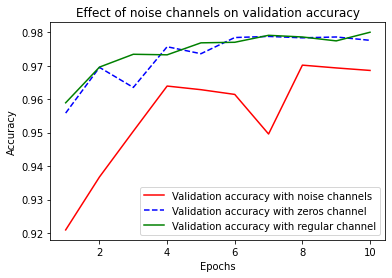

In [48]:
def listing5_1():
    from tensorflow.keras.datasets import mnist
    import numpy as np
    from tensorflow import keras # need for `tensorflow.keras` syntax
    from tensorflow.keras import layers
    import matplotlib.pyplot as plt
    
    (train_images, train_labels), _ = mnist.load_data()
    print(train_images.shape)
    
    train_images = train_images.reshape((60_000, 28*28))
    train_images = train_images.astype("float32") / 255
    print(train_images.shape)
    
    train_images_with_noise_channels = np.concatenate(
        [train_images, np.random.random((len(train_images), 784))], 
        axis=1
    )
    print(train_images_with_noise_channels.shape)

    train_images_with_zeros_channels = np.concatenate(
        [train_images, np.zeros((len(train_images), 784))],
        axis=1
    )
    print(train_images_with_zeros_channels.shape)

    
    # training model on mnist data with noise and all-zero channels
    def get_model():
        model = keras.Sequential([
            layers.Dense(512, activation='relu'),
            layers.Dense(10, activation='softmax')
        ])
        model.compile(
            optimizer='rmsprop',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )
        return model
    
    model1 = get_model()
    history_noise = model1.fit(
        train_images_with_noise_channels,
        train_labels,
        epochs=10,
        batch_size=128,
        validation_split=0.2, # automatically creates val data
        verbose=2
    )
    print()
    result1 = model1.evaluate(train_images_with_noise_channels, train_labels)
    print(model1.metrics_names)
    print(history_noise.history.keys())
    print(result1)
    print()
    
    model2 = get_model()
    history_zeros = model2.fit(
        train_images_with_zeros_channels,
        train_labels,
        epochs=10,
        batch_size=128,
        validation_split=0.2,
        verbose=2
    )
    print()
    result2 = model2.evaluate(train_images_with_zeros_channels, train_labels)
    print(model2.metrics_names)
    print(history_zeros.history.keys())
    print(result2)
    print()
    
    
    model3 = get_model()
    history_regular = model3.fit(
        train_images,
        train_labels,
        epochs=10,
        batch_size=128,
        validation_split=0.2,
        verbose=2
    )
    print()
    result3 = model3.evaluate(train_images, train_labels)
    print(model3.metrics_names)
    print(history_zeros.history.keys())
    print(result3)
    print()
    
    
    val_acc_noise = history_noise.history['val_accuracy']
    val_acc_zeros = history_zeros.history['val_accuracy']
    val_acc_regular = history_regular.history['val_accuracy']
    epochs = range(1, 11)
    fig1 = plt.figure()
    ax1 = fig1.add_subplot()
    ax1.plot(epochs, val_acc_noise, "r-", label="Validation accuracy with noise channels")
    ax1.plot(epochs, val_acc_zeros, "b--", label="Validation accuracy with zeros channel")
    ax1.plot(epochs, val_acc_regular, "g-", label="Validation accuracy with regular channel")
    ax1.set_title("Effect of noise channels on validation accuracy")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Accuracy")
    ax1.legend()
                   
    plt.show()
    
listing5_1()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


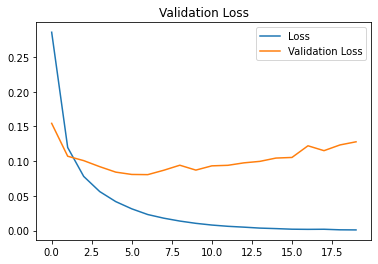

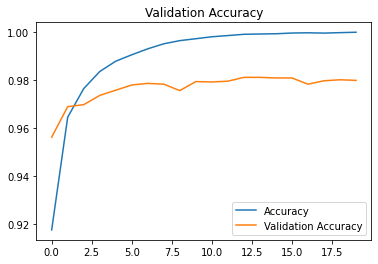

In [57]:
# without shuffling the label data
def listing5_4():
    import tensorflow
    from tensorflow import keras
    from tensorflow.keras import layers
    from tensorflow.keras.datasets import mnist
    import numpy as np
    import matplotlib.pyplot as plt
    
    (train_images, train_labels), _ = mnist.load_data()
    train_images = train_images.reshape((60_000, 28*28))
    train_images = train_images.astype("float32")/255
    
    random_train_labels = train_labels[:]
    #np.random.shuffle(random_train_labels)
    
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    
    model.compile(
        optimizer="rmsprop",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )]
    
    hist = model.fit(
        train_images,
        random_train_labels,
        epochs=20,
        batch_size=128,
        validation_split=0.2,
        verbose=0,
    )
    
    print(hist.history.keys())
    # dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
    
    fig1 = plt.figure()
    ax1 = fig1.add_subplot()
    ax1.plot(hist.history['loss'], label='Loss')
    ax1.plot(hist.history['val_loss'], label='Validation Loss')
    ax1.set_title('Validation Loss')
    ax1.legend()
    
    fig2 = plt.figure()
    ax2 = fig2.add_subplot()
    ax2.plot(hist.history['accuracy'], label='Accuracy')
    ax2.plot(hist.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_title('Validation Accuracy')
    ax2.legend()

    plt.show()
    
listing5_4()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


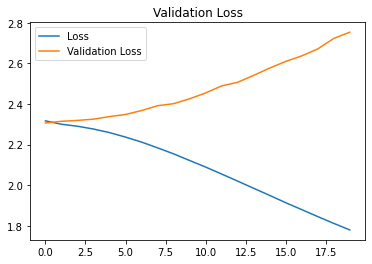

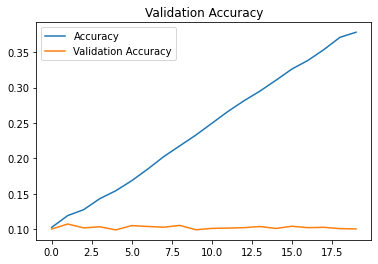

In [58]:
# Hold-out validation
def listing5_5():
    import tensorflow
    from tensorflow import keras
    from tensorflow.keras import layers
    from tensorflow.keras.datasets import mnist
    import numpy as np
    import matplotlib.pyplot as plt
    
    (train_images, train_labels), _ = mnist.load_data()
    train_images = train_images.reshape((60_000, 28*28))
    train_images = train_images.astype("float32")/255
    
    random_train_labels = train_labels[:]
    np.random.shuffle(random_train_labels)
    
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    
    model.compile(
        optimizer="rmsprop",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    
    hist = model.fit(
        train_images,
        random_train_labels,
        epochs=20,
        batch_size=128,
        validation_split=0.2,
        verbose=0,
    )
    
    print(hist.history.keys())
    # dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
    
    fig1 = plt.figure()
    ax1 = fig1.add_subplot()
    ax1.plot(hist.history['loss'], label='Loss')
    ax1.plot(hist.history['val_loss'], label='Validation Loss')
    ax1.set_title('Validation Loss')
    ax1.legend()
    
    fig2 = plt.figure()
    ax2 = fig2.add_subplot()
    ax2.plot(hist.history['accuracy'], label='Accuracy')
    ax2.plot(hist.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_title('Validation Accuracy')
    ax2.legend()

    plt.show()
    
listing5_5()

In [ ]:
# K-fold cross-validation
def listing5_6():
    import tensorflow
    from tensorflow import keras
    from tensorflow.keras import layers
    from tensorflow.keras.datasets import mnist
    import numpy as np
    import matplotlib.pyplot as plt
  
    (train_images, train_labels), (test_images, test_targets) = mnist.load_data()
    train_images = train_images.reshape((60_000, 28*28))
    train_images = train_images.astype("float32")/255
    
    print(train_images.shape, train_labels.shape)
    #print("test_images:", test_images[0][:20])
    
    # preparing the data. quantities used for normalizing the 
    # test data are computed using the training data
    
    #train_images = train_images.astype("float32")
    #test_images = test_images.astype("float32")
    
#     mean = train_images.mean(axis=0)
#     train_images -= mean
#     std = train_images.std(axis=0)
#     train_images /= std
#     test_images -= mean
#     test_images /= std
    
    
    
    # build model
    def build_model():
        model = keras.Sequential([
            layers.Dense(64, activation="relu"),
            layers.Dense(64, activation="relu"),
            # End with single unit and no activation, hence it's a linear layer
            # Applying an activation function constrains the output range, 
            # hence we don't apply one to the last layer. Since the last 
            # layer is linear, it can predict any continuous value.
            layers.Dense(1)
        ])
        
        # use mse and mae for regression-type problems
        # mae is absolute value of difference between predictions and targets
        model.compile(
            optimizer="rmsprop", 
            loss="mse", 
            metrics=["mae"]
        )
        return model
    
    
    # validate using K-fold validation, since we have so little data points
    k = 4

    num_val_samples = len(train_images) // k
    print(f'num of validation samples: {num_val_samples}')
    #num_epochs = 500
    num_epochs = 10
    all_scores = []
    all_mae_histories = []
    

    for i in range(k):
        print(f"Processing fold #{i}")

        # Select the validation-data partition
        val_data = train_images[i * num_val_samples: (i + 1) * num_val_samples]
        val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
        
        # Use the remainder of the data as training data.
        # The + operator represents list concatenation, not summation
        partial_train_images = np.concatenate(
            [train_images[:i * num_val_samples],
             train_images[(i + 1) * num_val_samples:]],
            axis=0)
        partial_train_labels = np.concatenate(
            [train_labels[:i * num_val_samples],
             train_labels[(i + 1) * num_val_samples:]],
            axis=0)
        
        # Create brand-new instance of the model (untrained)
        model = build_model()
        history = model.fit(partial_train_images, partial_train_labels,
                            validation_data=(val_data, val_targets),
                            epochs=num_epochs, batch_size=16, verbose=0)
        mae_history = history.history["val_mae"]
        all_mae_histories.append(mae_history)    
    
    
    print()
    
    average_mae_history = [
        np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
    

    plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
    plt.xlabel("Epochs")
    plt.ylabel("Validation MAE")
    plt.show()

    
    truncated_mae_history = average_mae_history[10:]
    plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
    plt.xlabel("Epochs")
    plt.ylabel("Validation MAE")
    plt.show()
    
    


    # Train the model on all non-test data available
    model = build_model()
    model.fit(train_images, train_labels,
              epochs=130, batch_size=16, verbose=0)
    test_mse_score, test_mae_score = model.evaluate(test_images, test_targets)

    print("test_mae_score", test_mae_score)
    
    
    predictions = model.predict(test_images)
    print(predictions[0])
    
#listing5_6()

In [7]:
# Training a MNIST model with incorrectly high learning rate
def listing5_7():
    import tensorflow
    from tensorflow import keras
    from tensorflow.keras import layers
    from tensorflow.keras.datasets import mnist
    
    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
    print(train_images.shape, test_images.shape)
    
    train_images = train_images.reshape((60_000, 28*28))
    train_images = train_images.astype("float32")/255
    
    test_images = test_images.reshape((10_000, 28*28))
    test_images = test_images.astype("float32")/255
    
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
        
    ])
    
    model.compile(
        optimizer=keras.optimizers.RMSprop(1.), # very large LR
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    
    hist = model.fit(
        train_images,
        train_labels,
        epochs=10,
        batch_size=128,
        validation_split=0.2
    )
    
    result = model.evaluate(
        test_images,
        test_labels
    )
    print()
    print(result)
    print(hist.history.keys())
    
    
listing5_7()

(60000, 28, 28) (10000, 28, 28)
Epoch 1/10
375/375 [==============================] - 3s 8ms/step - loss: 933.0477 - accuracy: 0.4132 - val_loss: 27.2840 - val_accuracy: 0.2162
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 5.5445 - accuracy: 0.2721 - val_loss: 2.1808 - val_accuracy: 0.2298
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 3.1787 - accuracy: 0.2709 - val_loss: 2.1447 - val_accuracy: 0.2907
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 3.1580 - accuracy: 0.2609 - val_loss: 2.5770 - val_accuracy: 0.2990
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 2.7985 - accuracy: 0.2699 - val_loss: 2.2222 - val_accuracy: 0.2262
Epoch 6/10
375/375 [==============================] - 3s 9ms/step - loss: 3.1025 - accuracy: 0.2534 - val_loss: 2.1328 - val_accuracy: 0.2258
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 2.5896 - accuracy: 0.2402 - val_loss: 2

In [8]:
# Training a MNIST model with reasonable learning rate
def listing5_8():
    import tensorflow
    from tensorflow import keras
    from tensorflow.keras import layers
    from tensorflow.keras.datasets import mnist
    
    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
    print(train_images.shape, test_images.shape)
    
    train_images = train_images.reshape((60_000, 28*28))
    train_images = train_images.astype("float32")/255
    
    test_images = test_images.reshape((10_000, 28*28))
    test_images = test_images.astype("float32")/255
    
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
        
    ])
    
    model.compile(
        # 1e-2 is 0.01
        optimizer=keras.optimizers.RMSprop(0.01), # very large LR
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    
    hist = model.fit(
        train_images,
        train_labels,
        epochs=10,
        batch_size=128,
        validation_split=0.2
    )
    
    result = model.evaluate(
        test_images,
        test_labels
    )
    print()
    print(result)
    print(hist.history.keys())
    
    
listing5_8()

(60000, 28, 28) (10000, 28, 28)
Epoch 1/10
375/375 [==============================] - 4s 10ms/step - loss: 0.3459 - accuracy: 0.9136 - val_loss: 0.1635 - val_accuracy: 0.9545
Epoch 2/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1472 - accuracy: 0.9635 - val_loss: 0.1925 - val_accuracy: 0.9557
Epoch 3/10
375/375 [==============================] - 3s 9ms/step - loss: 0.1196 - accuracy: 0.9722 - val_loss: 0.1622 - val_accuracy: 0.9679
Epoch 4/10
375/375 [==============================] - 3s 9ms/step - loss: 0.1053 - accuracy: 0.9771 - val_loss: 0.1961 - val_accuracy: 0.9690
Epoch 5/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0957 - accuracy: 0.9809 - val_loss: 0.2266 - val_accuracy: 0.9693
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0867 - accuracy: 0.9834 - val_loss: 0.2075 - val_accuracy: 0.9747
Epoch 7/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0722 - accuracy: 0.9862 - val_loss: 0.

(60000, 28, 28) (10000, 28, 28)
Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6717 - accuracy: 0.8336 - val_loss: 0.3580 - val_accuracy: 0.9040
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3499 - accuracy: 0.9042 - val_loss: 0.3071 - val_accuracy: 0.9152
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3146 - accuracy: 0.9123 - val_loss: 0.2896 - val_accuracy: 0.9200
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2987 - accuracy: 0.9159 - val_loss: 0.2812 - val_accuracy: 0.9234
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2892 - accuracy: 0.9190 - val_loss: 0.2750 - val_accuracy: 0.9243
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2826 - accuracy: 0.9213 - val_loss: 0.2733 - val_accuracy: 0.9239
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2778 - accuracy: 0.9223 - val_loss: 0.26

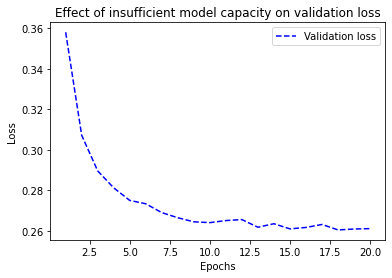

In [11]:
# Simple logistic regression on MNIST
def listing5_9():
    import tensorflow
    from tensorflow import keras
    from tensorflow.keras import layers
    from tensorflow.keras.datasets import mnist
    import matplotlib.pyplot as plt
    
    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
    print(train_images.shape, test_images.shape)
    
    train_images = train_images.reshape((60_000, 28*28))
    train_images = train_images.astype("float32")/255
    
    test_images = test_images.reshape((10_000, 28*28))
    test_images = test_images.astype("float32")/255
    
    model = keras.Sequential([
        layers.Dense(10, activation="softmax")
    ])
    
    model.compile(
        optimizer="rmsprop",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    
    hist_small_model = model.fit(
        train_images,
        train_labels,
        epochs=20,
        batch_size=128,
        validation_split=0.2
    )
    
    result = model.evaluate(
        test_images,
        test_labels
    )
    print()
    print(result)
    print(hist_small_model.history.keys())
    
    val_loss = hist_small_model.history["val_loss"]
    epochs = range(1, 21)
    plt.plot(
        epochs,
        val_loss,
        "b--",
        label="Validation loss"
    )
    plt.title("Effect of insufficient model capacity on validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    
listing5_9()

(60000, 28, 28) (10000, 28, 28)
Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3596 - accuracy: 0.8979 - val_loss: 0.1899 - val_accuracy: 0.9436
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1614 - accuracy: 0.9522 - val_loss: 0.1298 - val_accuracy: 0.9634
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1134 - accuracy: 0.9657 - val_loss: 0.1221 - val_accuracy: 0.9656
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0881 - accuracy: 0.9734 - val_loss: 0.1025 - val_accuracy: 0.9682
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0702 - accuracy: 0.9787 - val_loss: 0.1038 - val_accuracy: 0.9699
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0584 - accuracy: 0.9816 - val_loss: 0.0935 - val_accuracy: 0.9743
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0480 - accuracy: 0.9846 - val_loss: 0.09

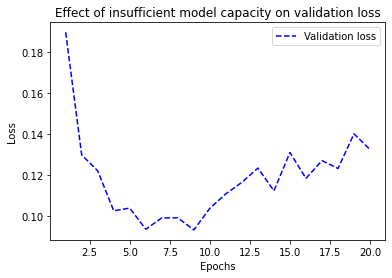

In [12]:
# Simple logistic regression on MNIST, using bigger model
def listing5_9b():
    import tensorflow
    from tensorflow import keras
    from tensorflow.keras import layers
    from tensorflow.keras.datasets import mnist
    import matplotlib.pyplot as plt
    
    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
    print(train_images.shape, test_images.shape)
    
    train_images = train_images.reshape((60_000, 28*28))
    train_images = train_images.astype("float32")/255
    
    test_images = test_images.reshape((10_000, 28*28))
    test_images = test_images.astype("float32")/255
    
    model = keras.Sequential([
        layers.Dense(96, activation="relu"),
        layers.Dense(96, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    
    model.compile(
        optimizer="rmsprop",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    
    hist_small_model = model.fit(
        train_images,
        train_labels,
        epochs=20,
        batch_size=128,
        validation_split=0.2
    )
    
    result = model.evaluate(
        test_images,
        test_labels
    )
    print()
    print(result)
    print(hist_small_model.history.keys())
    
    val_loss = hist_small_model.history["val_loss"]
    epochs = range(1, 21)
    plt.plot(
        epochs,
        val_loss,
        "b--",
        label="Validation loss"
    )
    plt.title("Effect of insufficient model capacity on validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    
listing5_9b()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


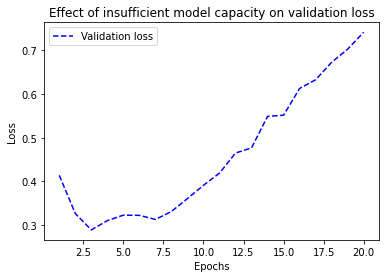

In [20]:
# Original model

def listing5_10():
    import tensorflow
    from tensorflow import keras
    from tensorflow.keras import layers
    from tensorflow.keras.datasets import imdb
    import matplotlib.pyplot as plt
    import numpy as np
    
    (train_data, train_labels), _ = imdb.load_data(num_words=10_000)
    
    def vectorize_sequences(sequences, dimension=10_000):
        results = np.zeros((len(sequences), dimension))
        for i, sequence in enumerate(sequences):
            results[i, sequence]= 1.
        return results
    
    train_data = vectorize_sequences(train_data)
    
    
    model = keras.Sequential([
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])
    
    model.compile(
        optimizer="rmsprop",
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    
    hist_original = model.fit(
        train_data,
        train_labels,
        epochs=20,
        batch_size=512,
        validation_split=0.4,
        verbose=0
    )
    

    print()
    print(hist_original.history.keys())
    
    val_loss = hist_original.history["val_loss"]
    epochs = range(1, 21)
    plt.plot(
        epochs,
        val_loss,
        "b--",
        label="Validation loss"
    )
    plt.title("Effect of insufficient model capacity on validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    
listing5_10()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


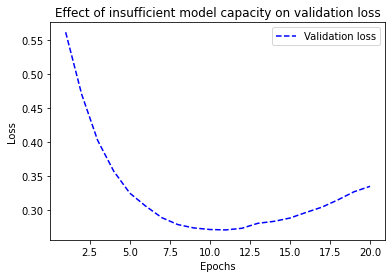

In [21]:
# Lower capacity model

def listing5_11():
    import tensorflow
    from tensorflow import keras
    from tensorflow.keras import layers
    from tensorflow.keras.datasets import imdb
    import matplotlib.pyplot as plt
    import numpy as np
    
    (train_data, train_labels), _ = imdb.load_data(num_words=10_000)
    
    def vectorize_sequences(sequences, dimension=10_000):
        results = np.zeros((len(sequences), dimension))
        for i, sequence in enumerate(sequences):
            results[i, sequence]= 1.
        return results
    
    train_data = vectorize_sequences(train_data)
    
    
    model = keras.Sequential([
        layers.Dense(4, activation="relu"),
        layers.Dense(4, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])
    
    model.compile(
        optimizer="rmsprop",
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    
    hist_original = model.fit(
        train_data,
        train_labels,
        epochs=20,
        batch_size=512,
        validation_split=0.4,
        verbose=0
    )
    

    print()
    print(hist_original.history.keys())
    
    val_loss = hist_original.history["val_loss"]
    epochs = range(1, 21)
    plt.plot(
        epochs,
        val_loss,
        "b--",
        label="Validation loss"
    )
    plt.title("Effect of insufficient model capacity on validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    
listing5_11()

In [2]:
# Higher capacity model

def listing5_12():
    import tensorflow
    from tensorflow import keras
    from tensorflow.keras import layers
    from tensorflow.keras.datasets import imdb
    import matplotlib.pyplot as plt
    import numpy as np
    
    (train_data, train_labels), _ = imdb.load_data(num_words=10_000)
    
    def vectorize_sequences(sequences, dimension=10_000):
        results = np.zeros((len(sequences), dimension))
        for i, sequence in enumerate(sequences):
            results[i, sequence]= 1.
        return results
    
    train_data = vectorize_sequences(train_data)
    
    
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(512, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])
    
    model.compile(
        optimizer="rmsprop",
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    
    hist_original = model.fit(
        train_data,
        train_labels,
        epochs=20,
        batch_size=512,
        validation_split=0.4,
        verbose=0
    )
    

    print()
    print(hist_original.history.keys())
    
    val_loss = hist_original.history["val_loss"]
    epochs = range(1, 21)
    plt.plot(
        epochs,
        val_loss,
        "b--",
        label="Validation loss"
    )
    plt.title("Effect of insufficient model capacity on validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    
listing5_12()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


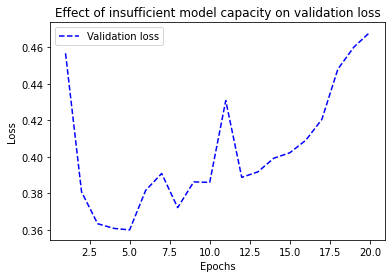

In [7]:
# Adding weight regularization
# Adding L2 weight regularization to the model
# Put constraints on the complexity of a model by forcing its weights to take 
# only small values, which makes the distribution of weight values more regular.

def listing5_13():
    import tensorflow
    from tensorflow import keras
    from tensorflow.keras import layers
    from tensorflow.keras.datasets import imdb
    import matplotlib.pyplot as plt
    import numpy as np
    from tensorflow.keras import regularizers
    
    (train_data, train_labels), _ = imdb.load_data(num_words=10_000)
    
    def vectorize_sequences(sequences, dimension=10_000):
        results = np.zeros((len(sequences), dimension))
        for i, sequence in enumerate(sequences):
            results[i, sequence]= 1.
        return results
    
    train_data = vectorize_sequences(train_data)
    
    
    model = keras.Sequential([
        layers.Dense(16,
                     kernel_regularizer=regularizers.l2(0.002),
                     activation="relu"),
        layers.Dense(16,
                     kernel_regularizer=regularizers.l2(0.002),
                     activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])
    
    model.compile(
        optimizer="rmsprop",
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    
    history_l2_reg = model.fit(
        train_data, 
        train_labels,
        epochs=20, 
        batch_size=512, 
        validation_split=0.4,
        verbose=0
    )
    

    print()
    print(history_l2_reg.history.keys())
    
    val_loss = history_l2_reg.history["val_loss"]
    epochs = range(1, 21)
    plt.plot(
        epochs,
        val_loss,
        "b--",
        label="Validation loss"
    )
    plt.title("Effect of insufficient model capacity on validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    
listing5_13()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


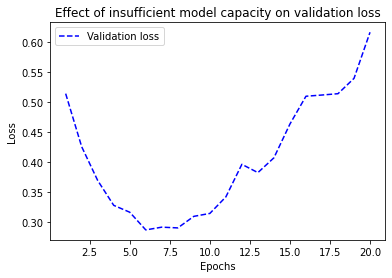

In [9]:
# Adding dropout to the IMDB model

# Weight regularization is more typically used for smaller deep learning 
# models. Large deep learning models tend to be so over-parameterized 
# that imposing constraints on weight values hasn’t much impact on model 
# capacity and generalization. In these cases, a different regularization 
# technique is preferred: dropout.

def listing5_15():
    import tensorflow
    from tensorflow import keras
    from tensorflow.keras import layers
    from tensorflow.keras.datasets import imdb
    import matplotlib.pyplot as plt
    import numpy as np
    from tensorflow.keras import regularizers
    
    (train_data, train_labels), _ = imdb.load_data(num_words=10_000)
    
    def vectorize_sequences(sequences, dimension=10_000):
        results = np.zeros((len(sequences), dimension))
        for i, sequence in enumerate(sequences):
            results[i, sequence]= 1.
        return results
    
    train_data = vectorize_sequences(train_data)
    
    
    model = keras.Sequential([
        layers.Dense(16, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(16, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(1, activation="sigmoid")
    ])
    
    model.compile(
        optimizer="rmsprop",
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    
    history_dropout = model.fit(
        train_data, 
        train_labels,
        epochs=20, 
        batch_size=512, 
        validation_split=0.4,
        verbose=0
    )
    

    print()
    print(history_dropout.history.keys())
    
    val_loss = history_dropout.history["val_loss"]
    epochs = range(1, 21)
    plt.plot(
        epochs,
        val_loss,
        "b--",
        label="Validation loss"
    )
    plt.title("Effect of insufficient model capacity on validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    
listing5_15()